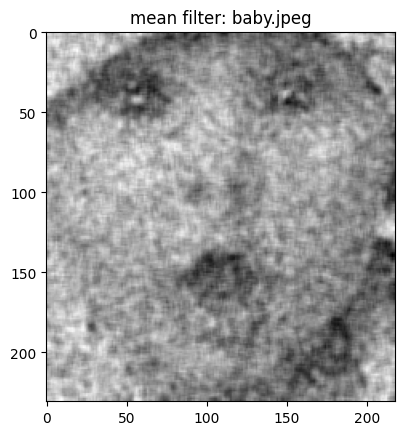

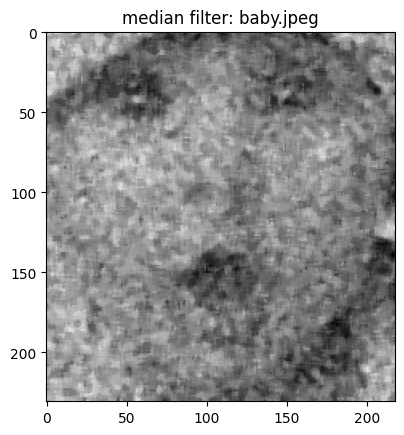

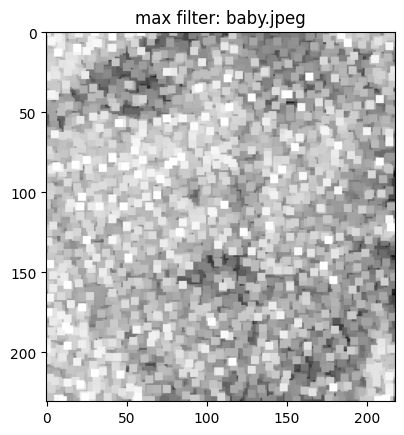

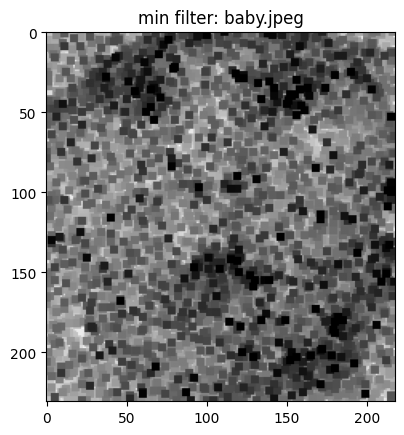

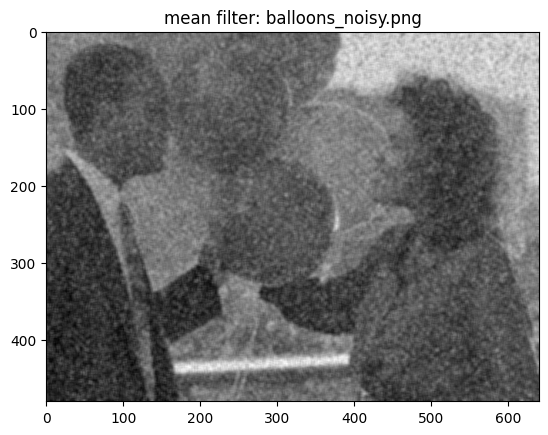

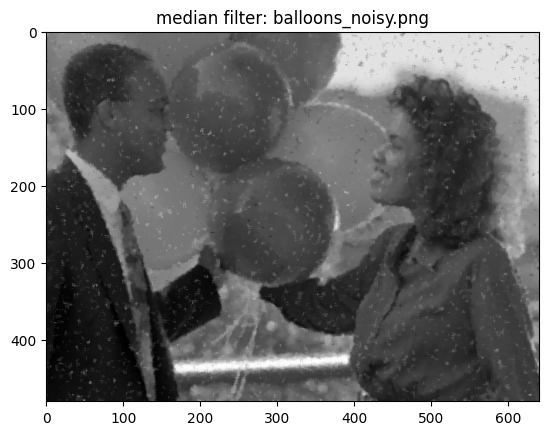

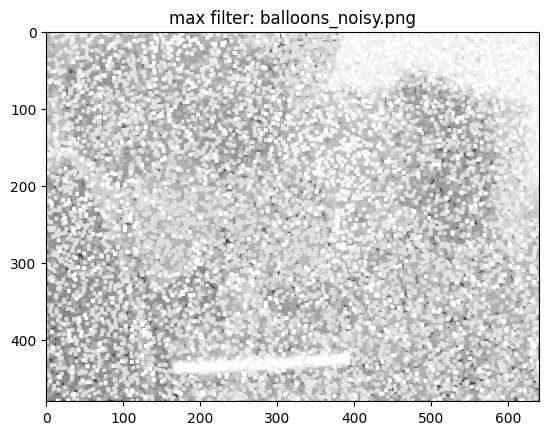

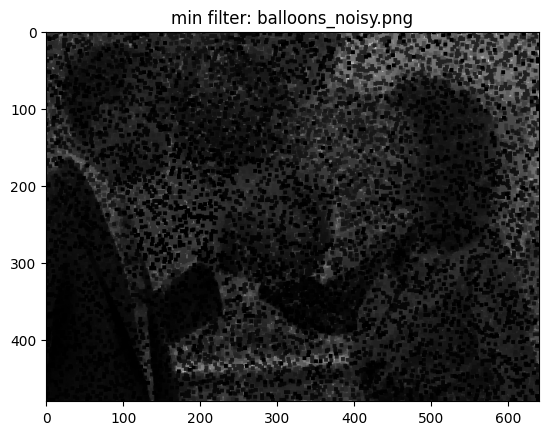

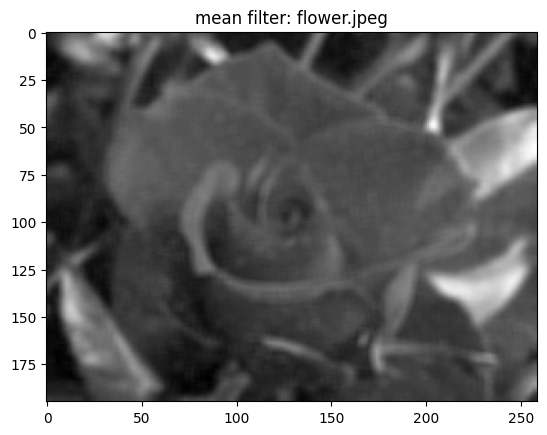

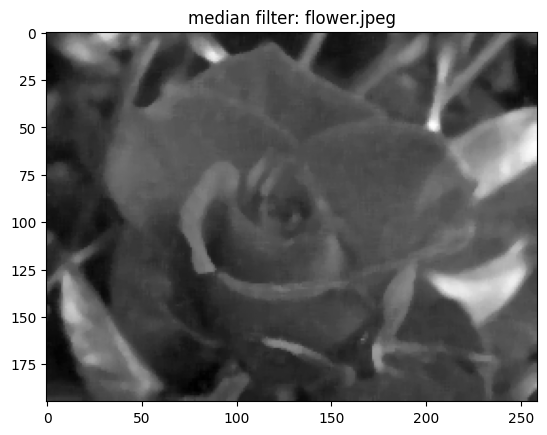

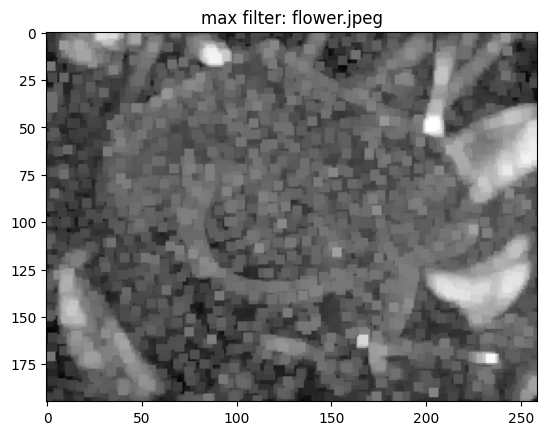

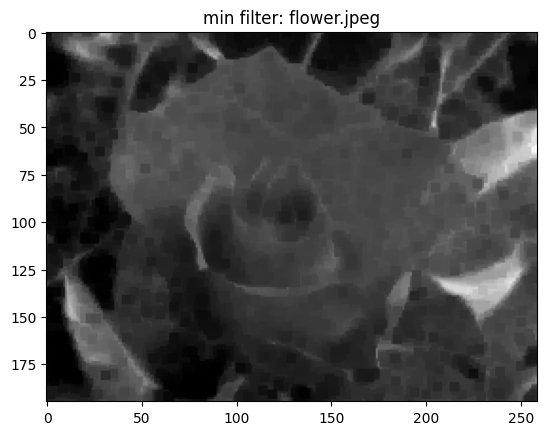

In [10]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as sn
import os

filters = {
    'mean': lambda a: sn.convolve(a, np.ones((5,5))/25),
    'median': lambda a: sn.median_filter(a, size=5),
    'max': lambda a: sn.maximum_filter(a, size=5),
    'min': lambda a: sn.minimum_filter(a, size=5)
}

for fname in os.listdir('Exercise'):
    if fname.endswith('.png') or fname.endswith('.jpeg'):
        a = iio.imread(os.path.join('Exercise', fname), mode='F')

        for name, func in filters.items():
            b = func(a).astype(np.uint8)
            plt.imshow(b, cmap='gray')
            plt.title(f'{name} filter: {fname}')
            
            plt.show()


Đang xử lý ảnh: baby.jpeg


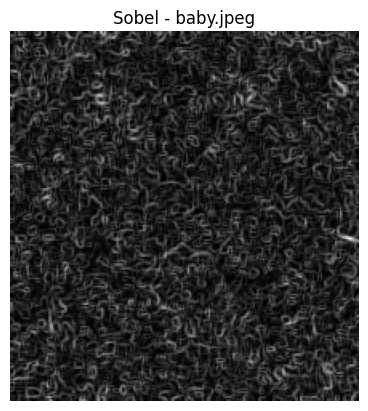

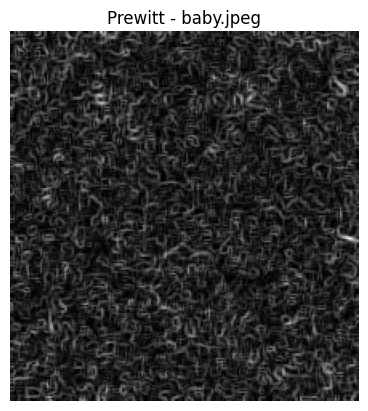

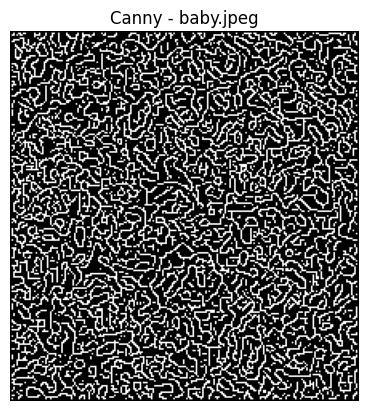

Đang xử lý ảnh: balloons_noisy.png


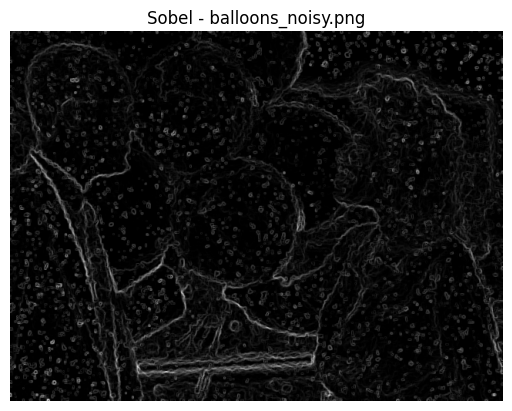

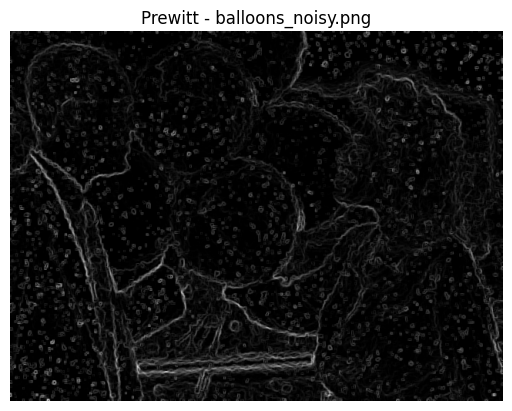

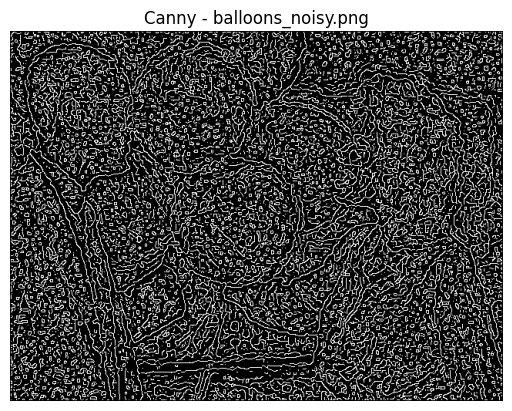

Đang xử lý ảnh: flower.jpeg


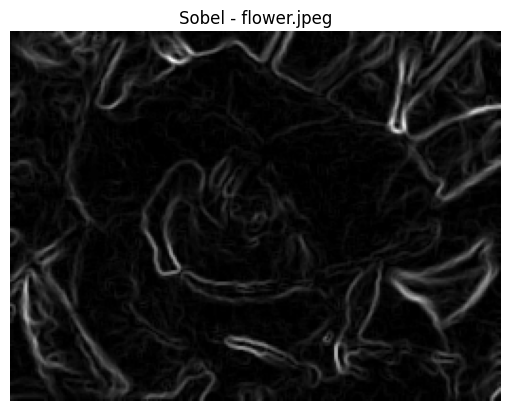

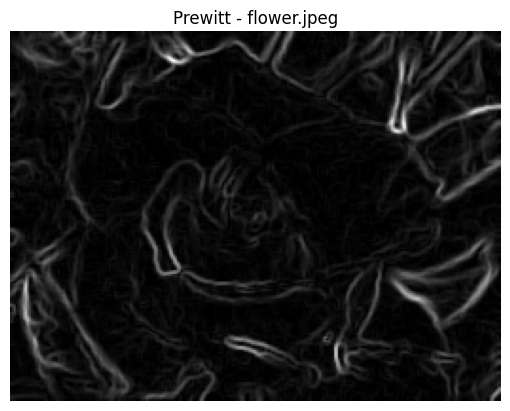

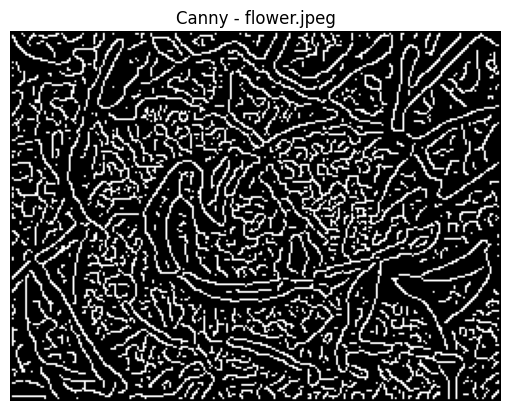

In [14]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters, feature
import matplotlib.pyplot as plt
import os

# Duyệt các ảnh trong thư mục 'exercise'
for fname in os.listdir('exercise'):
    if fname.endswith('.png') or fname.endswith('.jpeg'):
        path = os.path.join('exercise', fname)
        print('Đang xử lý ảnh:', fname)

        # Bước 1: Đọc ảnh ở dạng xám
        a = iio.imread(path, mode='F')

        # Bước 2: Khử nhiễu bằng median filter
        a = sn.median_filter(a, size=5)

        # Bước 3: Áp dụng các filter phát hiện biên

        # Sobel
        sobel = filters.sobel(a).astype(np.uint8)
        iio.imwrite(f'picture/sobel_edge_{fname}', sobel)

        # Prewitt
        prewitt = filters.prewitt(a).astype(np.uint8)
        iio.imwrite(f'picture/prewitt_edge_{fname}', prewitt)

        # Canny (trả về boolean → cần nhân 255)
        canny = feature.canny(a).astype(np.uint8) * 255
        iio.imwrite(f'picture/canny_edge_{fname}', canny)

        # Bước 4: Hiển thị kết quả (tuỳ chọn)
        for method, img in zip(['Sobel', 'Prewitt', 'Canny'], [sobel, prewitt, canny]):
            plt.imshow(img, cmap='gray')
            plt.title(f'{method} - {fname}')
            plt.axis('off')
            plt.show()


Xử lý ảnh: baby.jpeg


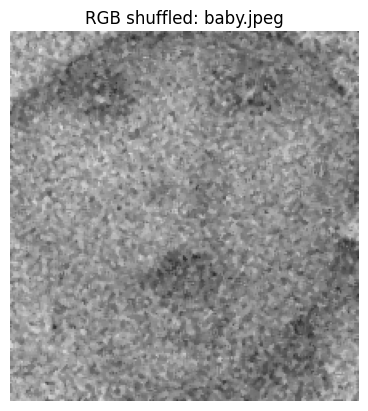

Xử lý ảnh: balloons_noisy.png


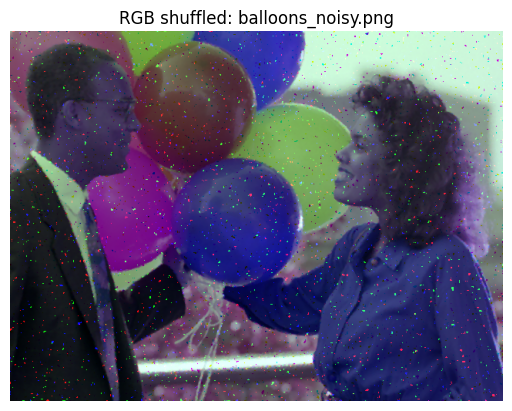

Xử lý ảnh: flower.jpeg


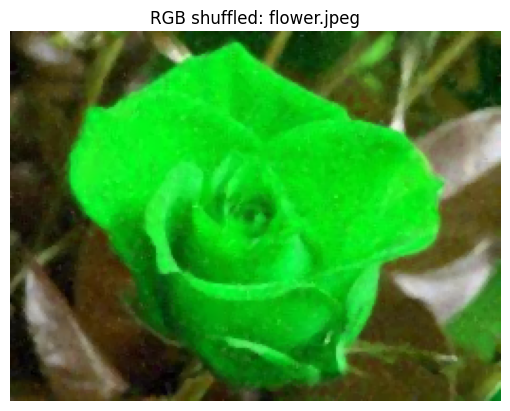

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt
import os

# Tạo thư mục lưu ảnh nếu chưa có
os.makedirs('picture', exist_ok=True)

# Duyệt từng ảnh trong thư mục 'exercise'
for fname in os.listdir('exercise'):
    if fname.endswith('.png') or fname.endswith('.jpeg') :
        path = os.path.join('exercise', fname)
        print('Xử lý ảnh:', fname)

        # Bước 1: Đọc ảnh
        a = iio.imread(path)

        # Bước 2: Khử nhiễu bằng median filter
        if len(a.shape) == 3:  # Ảnh màu RGB
            a_filtered = np.zeros_like(a)
            for c in range(3):  # Lọc riêng từng kênh R, G, B
                a_filtered[:,:,c] = sn.median_filter(a[:,:,c], size=3)
        else:  # Ảnh xám
            a_filtered = sn.median_filter(a, size=3)

        # Bước 3: Nếu ảnh màu → thực hiện đổi kênh RGB
        if len(a_filtered.shape) == 3 and a_filtered.shape[2] == 3:
            idx = np.random.permutation(3)  # ví dụ: [2,0,1]
            b = a_filtered[:,:,idx]

            # Bước 4: Lưu ảnh mới
            iio.imwrite(f'picture/rgb_random_{fname}', b)

            # (Tuỳ chọn) hiển thị ảnh
            plt.imshow(b)
            plt.title(f'RGB shuffled: {fname}')
            plt.axis('off')
            plt.show()
        else:
            print(f'Bỏ qua ảnh xám: {fname} (không phải RGB)')


Xử lý ảnh: baby.jpeg


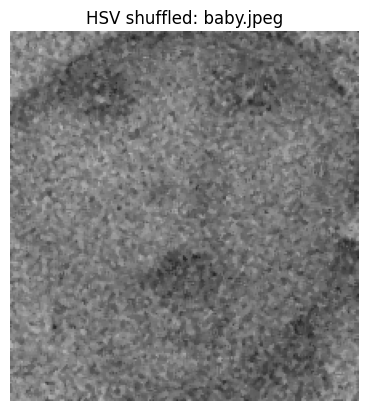

Xử lý ảnh: balloons_noisy.png


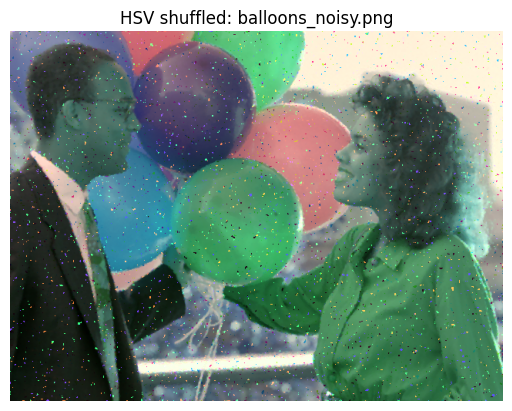

Xử lý ảnh: flower.jpeg


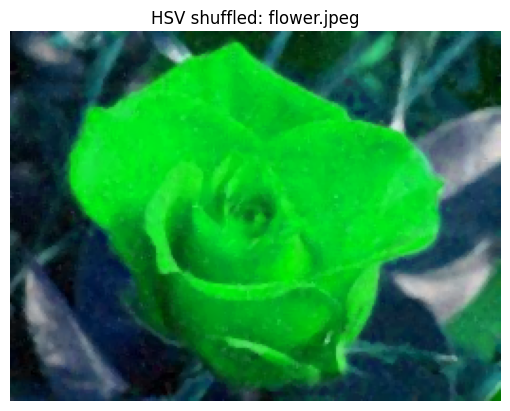

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt
import colorsys
import os

# Tạo thư mục lưu ảnh nếu chưa có
os.makedirs('picture', exist_ok=True)

for fname in os.listdir('exercise'):
    if fname.endswith('.png') or fname.endswith('.jpeg'):
        path = os.path.join('exercise', fname)
        print('Xử lý ảnh:', fname)

        # Bước 1: Đọc và khử nhiễu
        a = iio.imread(path)
        if len(a.shape) == 3 and a.shape[2] == 3:
            a_filtered = np.zeros_like(a)
            for c in range(3):
                a_filtered[:,:,c] = sn.median_filter(a[:,:,c], size=3)
        else:
            print(f'Bỏ qua ảnh xám: {fname}')
            continue

        # Bước 2: Chuyển RGB → HSV
        a_norm = a_filtered / 255.0
        rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
        hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)

        r, g, b = a_norm[:,:,0], a_norm[:,:,1], a_norm[:,:,2]
        h, s, v = rgb2hsv(r, g, b)

        # Bước 3: Thay đổi H, S, V ngẫu nhiên
        h_new = np.mod(h + np.random.uniform(0.2, 0.8), 1.0)    # xoay màu
        s_new = np.clip(s * np.random.uniform(0.7, 1.3), 0, 1)  # đổi độ đậm
        v_new = np.clip(v * np.random.uniform(0.7, 1.3), 0, 1)  # đổi độ sáng

        # Bước 4: Chuyển HSV → RGB
        r_new, g_new, b_new = hsv2rgb(h_new, s_new, v_new)
        b_result = np.stack([r_new, g_new, b_new], axis=2)

        # Bước 5: Lưu kết quả
        b_uint8 = (b_result * 255).astype(np.uint8)
        iio.imwrite(f'picture/hsv_random_{fname}', b_uint8)

        # Hiển thị kết quả
        plt.imshow(b_uint8)
        plt.title(f'HSV shuffled: {fname}')
        plt.axis('off')
        plt.show()
